# Exploring the Relationships Between Features

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pipeline as pipeline
import importlib

In [79]:
# for reloading the pipeline if neccesary...
importlib.reload(pipeline)

<module 'pipeline' from '/Users/matthewmauer/ML/project/pipeline.py'>

In [8]:
data = pipeline.read('total_data.csv')
data.sample(10)

There are 14188 rows and 22 in the data set.


,Unnamed: 0,ADMIN0,ADMIN1,month,year,CS,tmin_mm,tmax_mm,tavg_mm,prcp_mm,...,riot_cnt,explosion_cnt,violence_on_civs_cnt,battle_fatal,protest_fatal,riot_fatal,explosion_fatal,violence_on_civs_fatal,Retail,pop
10537,10874,Kenya,Bungoma,2.0,2017.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN,1375063.0
4627,4648,Ethiopia,Oromia,11.0,2010.0,NaN,125.750000,NaN,206.321429,58.071429,...,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,-0.558144,32107000.0
3415,3415,Somalia,Banaadir,4.0,2014.0,2.0,NaN,NaN,NaN,NaN,...,0.0,9.0,6.0,13.0,0.0,0.0,8.0,4.0,-0.625838,NaN
9237,9574,Somalia,Lower Shabelle,7.0,2016.0,NaN,NaN,NaN,NaN,NaN,...,0.0,8.0,5.0,88.0,0.0,0.0,1.0,7.0,-0.384187,NaN
5003,5045,Kenya,Marsabit,1.0,2020.0,NaN,189.928571,NaN,238.518519,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5015,5064,Kenya,Mombasa,9.0,2009.0,NaN,219.520000,298.730769,259.666667,3.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,939370.0
11892,12229,Ethiopia,SNNPR,3.0,2018.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,NaN,20730000.0
6135,6265,Sudan,Gezira,11.0,2012.0,NaN,180.666667,380.750000,270.642857,NaN,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,NaN,NaN
5682,5773,South Sudan,Central Equatoria,11.0,2017.0,NaN,NaN,NaN,309.666667,NaN,...,0.0,1.0,10.0,46.0,0.0,0.0,0.0,17.0,NaN,1634000.0
6731,6930,Sudan,Red Sea,5.0,2013.0,NaN,252.266667,383.333333,315.120000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.734001,1393000.0


## Impute Events
All NaN values for for an event count or event fatality feature are due to an absence of observations for any event type. Therefore,  we fill these NaNs with 0.

In [63]:
data.columns.values

array(['Unnamed: 0', 'ADMIN0', 'ADMIN1', 'month', 'year', 'CS', 'tmin_mm',
       'tmax_mm', 'tavg_mm', 'prcp_mm', 'battle_cnt', 'protest_cnt',
       'riot_cnt', 'explosion_cnt', 'violence_on_civs_cnt',
       'battle_fatal', 'protest_fatal', 'riot_fatal', 'explosion_fatal',
       'violence_on_civs_fatal', 'Retail', 'pop'], dtype=object)

In [80]:
data = pipeline.clean_events(data)

## Precipitation and Food Insecurity
UNsurprisingly, we see no obvious pattern or relationship as the hunger scores are concurrent with the month's rainfall. The effect of rainfall or lack thereof on hunger would not be expected to manifest until months later due to a diminished harvest

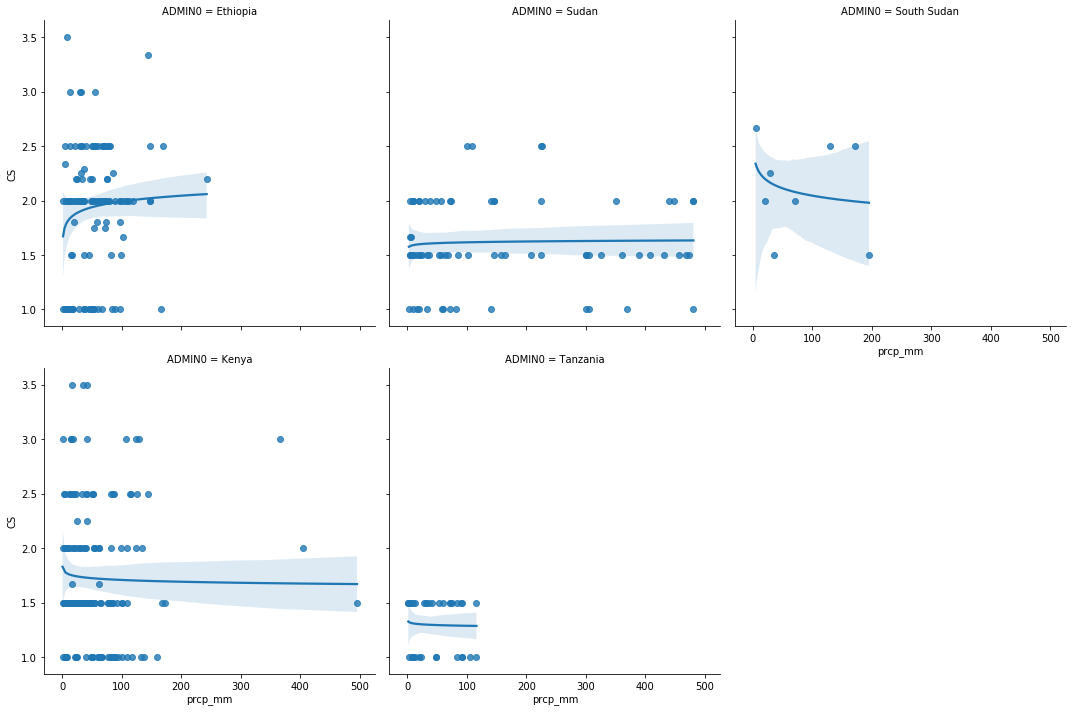

In [81]:
data_f = data[(data.prcp_mm < 500) & (data.prcp_mm >0)]
sns.lmplot(x='prcp_mm', y='CS', data=data_f, 
           order=1, col='ADMIN0', col_wrap=3, logx=True)

## Temperature and Hunger
Interestingly, in both Kneya nd Ethiopia, we see that higher temperatures appear to coincide with months of higher food insecurity. There can be several potential mechanisms for this. This might reflect some seasonality in food insecurity, hotter years may coincide with drought, or there may be a number of other reasons.

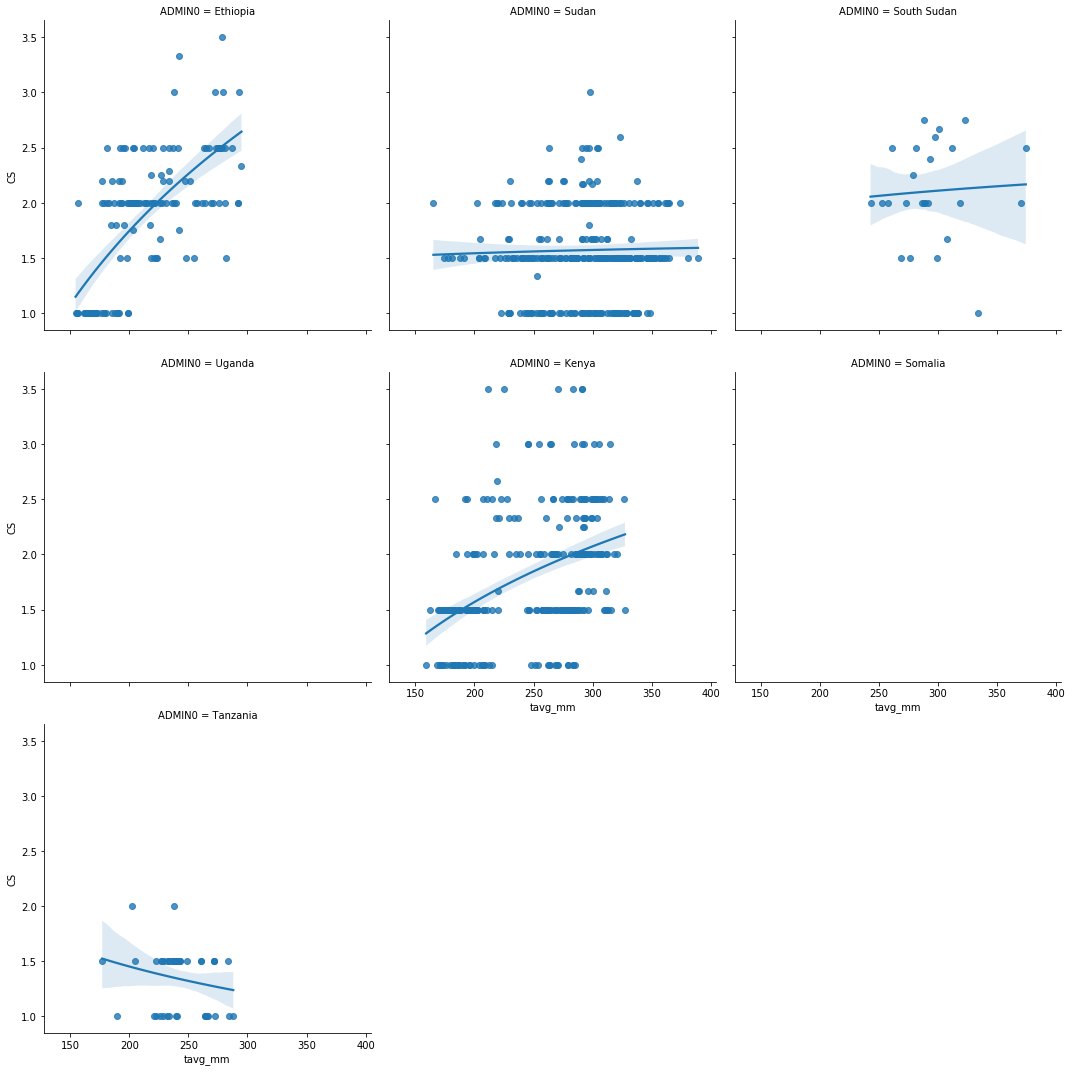

In [82]:
sns.lmplot(x='tavg_mm', y='CS', data=data, 
           order=1, col='ADMIN0', col_wrap=3, logx=True)

## Terrorism and Hunger
Most violent explosion events were concentrated in Somalia due to the presence of Al-Shabaab and other groups. Here and elsewhere, we see no obvious connection between hunger and concurrent terrorist attacks.

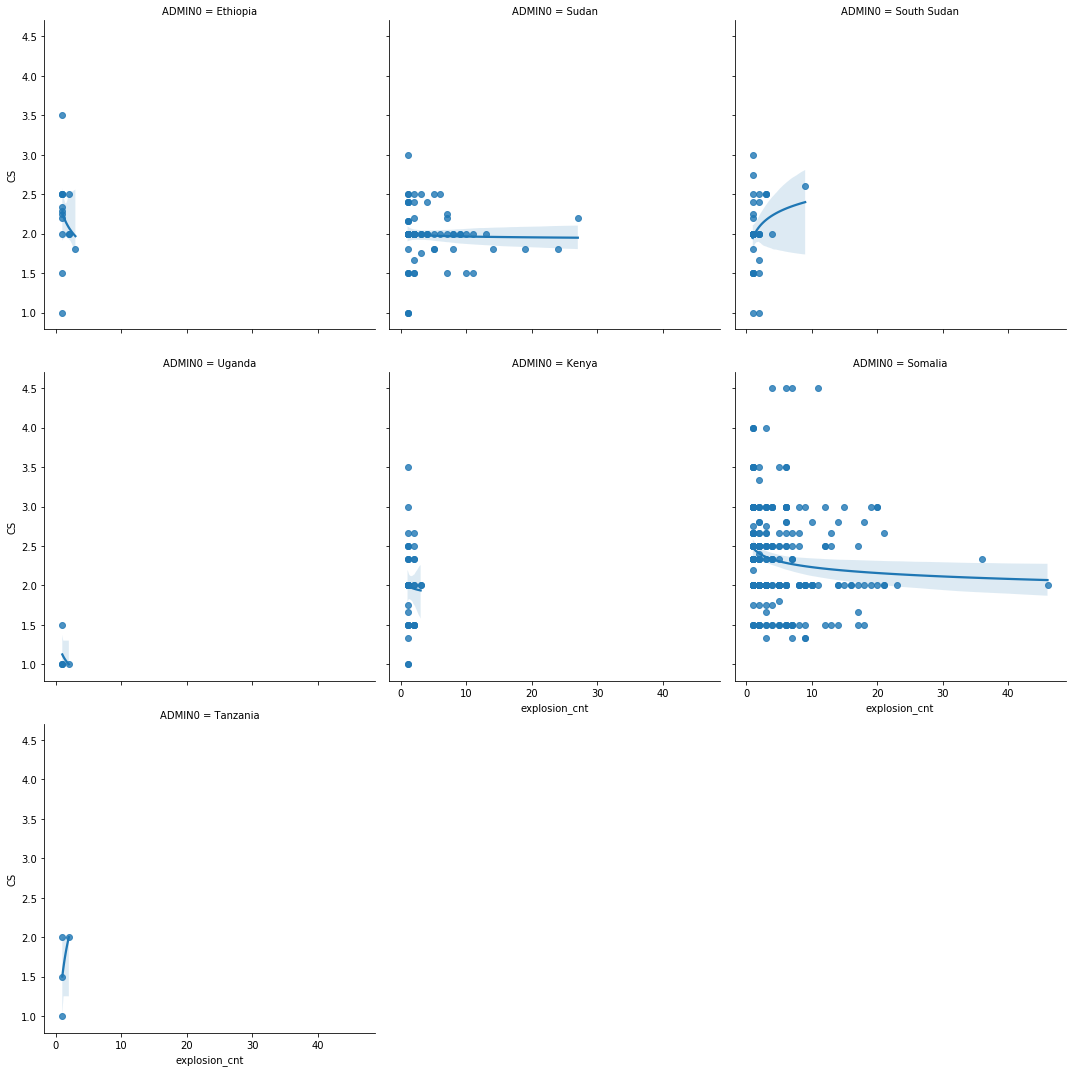

In [85]:
data_f = data[(data.explosion_cnt > 0) & (data.explosion_cnt < 400)]
sns.lmplot(x='explosion_cnt', y='CS', data=data_f, 
           order=1, col='ADMIN0', col_wrap=3, logx=True)

## Hunger and Protest
Here we check to see whether food inecurity effects the likelihood of protest. We see no obvious relationship.

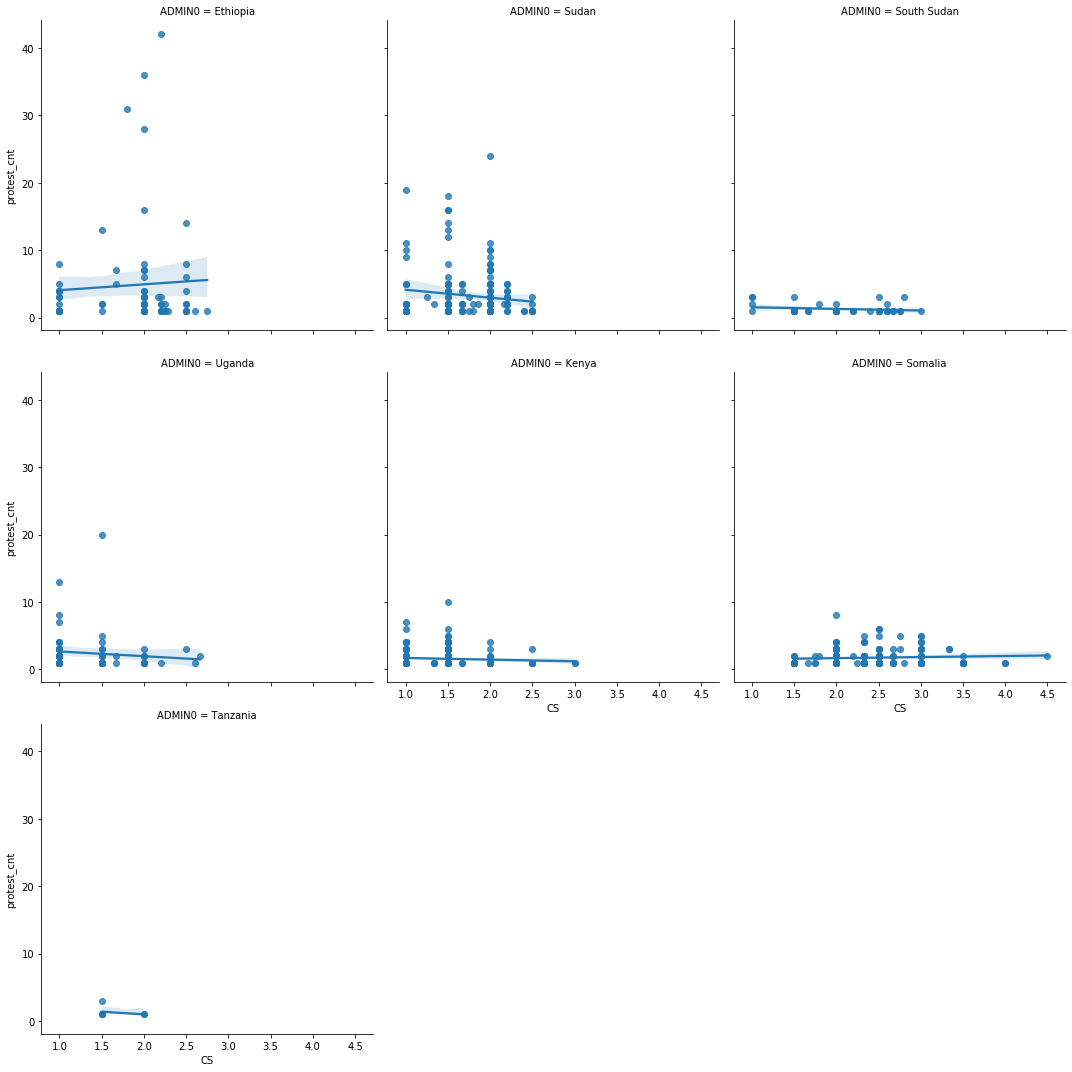

In [86]:
data_f = data[(data.protest_cnt > 0) & (data.protest_cnt < 50)]
sns.lmplot(x='CS', y='protest_cnt', data=data_f, 
           order=1, col='ADMIN0', col_wrap=3, logx=False)

## Changes in Food Prices and Hunger
It is possible that increases in food prices coincide with higher food insecurity, but the story is again not clear from our data.

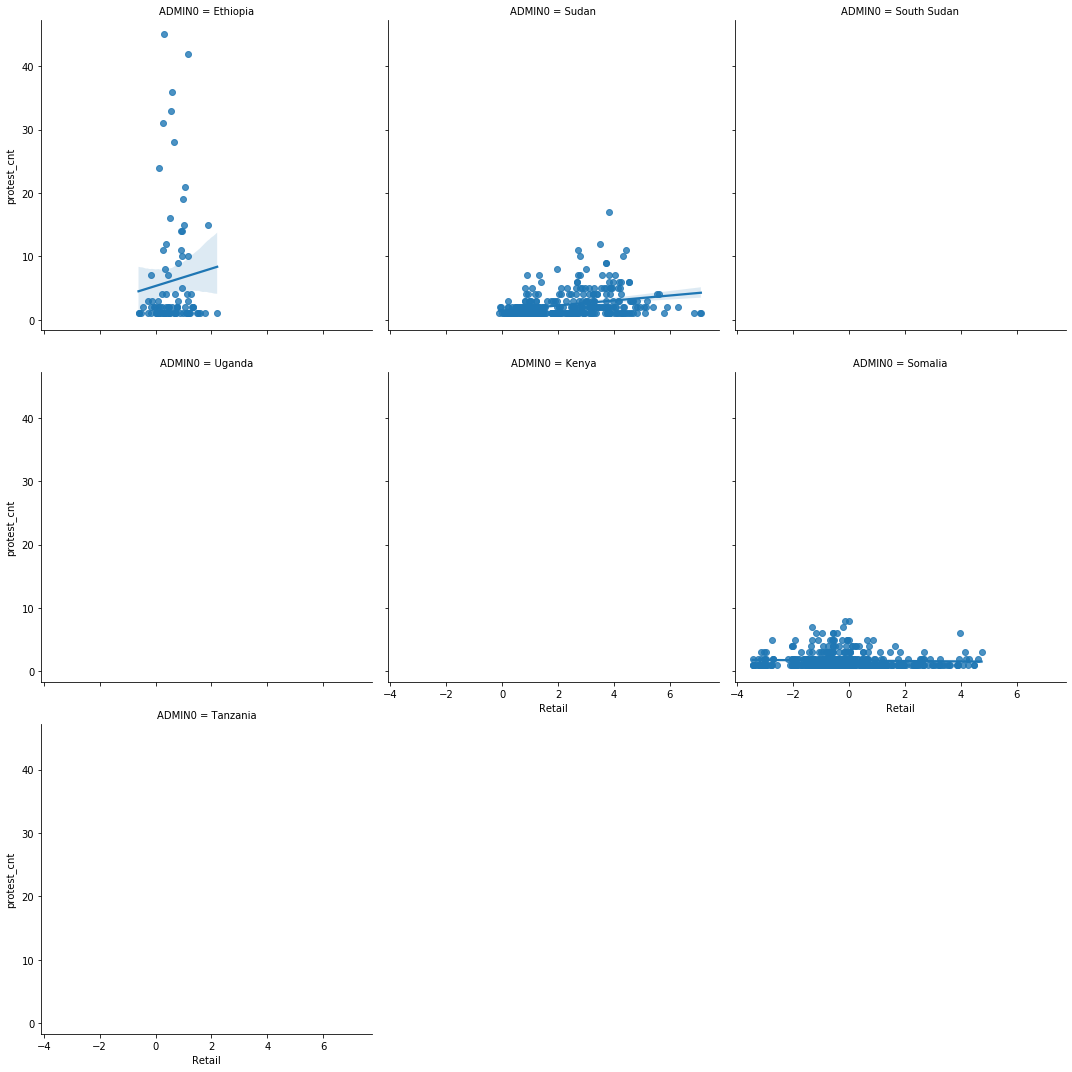

In [70]:
data_f = data[(data.protest_cnt > 0) & (data.protest_cnt < 50)]
sns.lmplot(x='Retail', y='protest_cnt', data=data_f, 
           order=1, col='ADMIN0', col_wrap=3, logx=False)

## War and Hunger
No clear relationship emerges between the number of battles in a region and the concurrent state of food security.

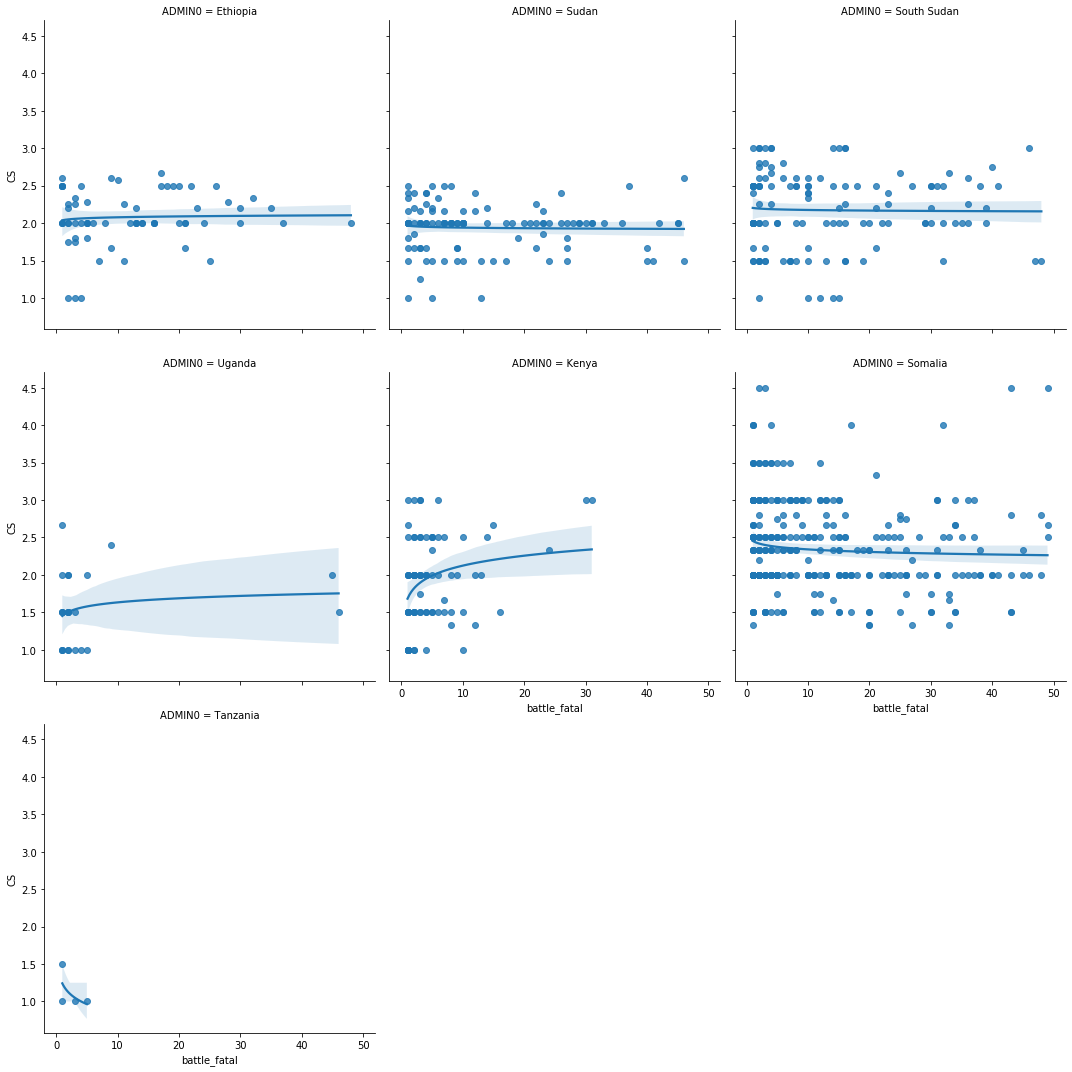

In [87]:
data_f = data[(data.battle_fatal > 0) & (data.battle_fatal < 50)]
sns.lmplot(x='battle_fatal', y='CS', data=data_f, 
           order=1, col='ADMIN0', col_wrap=3, logx=True)